In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# constants
filename = "rcv1_train.binary"
n = 200
d = 47205
# read data
data = []
with open(filename, "r") as f:
    for i in range(n):
        data.append(f.readline()[:-1].split(' '))
# prepare data
label = list(map(lambda x: int(x[0]), data))
train = []
for i in range(n):
    train.append([(0, 1.)])
    for j in range(1, len(data[i])):
        ind, val = data[i][j].split(':')
        ind = int(ind)
        val = float(val)
        train[i].append((ind, val))

In [16]:
for tr in train:
    res = 0.
    for _, val in tr:
        res += val * val
    print(res)

2.000000000000001
2.0000000000000013
1.9999999999999998
1.9999999999999982
1.9999999999999993
2.0000000000000018
1.999999999999999
2.0000000000000004
2.000000000000001
1.9999999999999998
2.0
2.0000000000000004
2.0
2.0000000000000013
2.0
2.0000000000000004
1.9999999999999998
1.9999999999999993
2.0
1.9999999999999998
1.9999999999999998
2.0000000000000013
1.9999999999999993
2.0
1.9999999999999993
2.0000000000000013
1.999999999999999
1.999999999999999
1.9999999999999996
1.9999999999999996
1.9999999999999991
1.9999999999999998
2.000000000000001
2.0000000000000004
1.999999999999999
1.999999999999999
1.9999999999999993
1.9999999999999998
1.9999999999999993
1.9999999999999982
1.9999999999999982
1.9999999999999996
1.9999999999999991
2.0000000000000018
2.000000000000001
1.9999999999999998
2.0000000000000004
2.0
1.9999999999999991
1.9999999999999998
1.9999999999999996
2.000000000000001
2.0
2.0000000000000004
2.000000000000001
1.9999999999999984
1.9999999999999996
2.0
1.9999999999999996
1.99999999

In [21]:
# utils
def predict(w, x):
    res = 0.
    for ind, val in x:
        res += w[ind] * val
    return 1 if res > 0 else -1

def update_weight(w, x, y):
    for ind, val in x:
        w[ind] += y * val

def experiment_pla(train, label):
    w = np.zeros((d + 1, ))
    consecutive_correct = 0
    check = 5 * n
    n_updates = 0
    weight_norms = []
    while consecutive_correct < check:
        picked_ind = np.random.choice(n)
        if predict(w, train[picked_ind]) == label[picked_ind]:
            consecutive_correct += 1
        else:
            consecutive_correct = 0
            n_updates += 1
            a = 0.
            b = 0.
            c = 0.
            for ind, val in train[picked_ind]:
                a += w[ind] * val
                b += val * val
                c += w[ind] * w[ind]
            print(c, label[picked_ind] * a, b, label[picked_ind] * a + b)
            #assert predict(w, train[picked_ind]) != label[picked_ind]
            update_weight(w, train[picked_ind], label[picked_ind])
            '''res = w[0]
            for ind, val in train[picked_ind]:
                res += w[ind] * val
            print(res)'''
            #assert predict(w, train[picked_ind]) == label[picked_ind]
            weight_norms.append(float(np.sqrt(w.T @ w)))
    return n_updates, weight_norms

def experiment_pla_modified(train, label):
    w = np.zeros((d + 1, ))
    consecutive_correct = 0
    indicies = list(range(n))
    check = 5 * n
    n_updates = 0
    weight_norms = []
    while consecutive_correct < check:
        picked_ind = np.random.choice(indicies)
        if predict(w, train[picked_ind]) == label[picked_ind]:
            consecutive_correct += 1
        else:
            k = 0
            while predict(w, train[picked_ind]) != label[picked_ind]:
                k += 1
                n_updates += 1
                update_weight(w, train[picked_ind], label[picked_ind])
                weight_norms.append(float(np.sqrt(w.T @ w)))
            assert k == 1
            consecutive_correct = 1
    return n_updates, weight_norms

In [22]:
n_experiment = 1000
updatesA = []
normsA = []
for i in range(n_experiment):
    np.random.seed(i)
    if i % 100 == 0:
        print(f"{i}-th experiment of PLA")
    n_updates, weight_norms = experiment_pla(train, label)
    updatesA.append(n_updates)
    normsA.append(weight_norms)

0-th experiment of PLA
0.0 0.0 2.0 2.0
1.0967770179341847 -1.0873447397142075 2.0 0.9126552602857925
0.06079764915496097 -0.007509410859074247 1.9999999999999998 1.9924905891409255
1.0966879415070803 -1.0484186733056244 2.0 0.9515813266943756
0.03872975460216328 -0.022179545581651743 1.999999999999999 1.977820454418347
1.2282607751902965 -0.9273568674875274 2.0000000000000004 1.072643132512473
0.17699518615520232 -0.040250872447220545 2.0000000000000018 1.9597491275527812
1.3903812099287962 -0.8625620010544756 2.0000000000000004 1.1374379989455248
0.42259062211317794 -0.10261039225716188 1.9999999999999982 1.8973896077428363
1.754999682847679 -0.6164800489727675 1.9999999999999984 1.383519951027231
0.11354835176638348 -0.04856008492303251 2.000000000000001 1.9514399150769683
1.5920724080004098 -0.6924887682967844 1.9999999999999998 1.3075112317032154
0.4027559056158156 -0.09794918096330896 2.000000000000001 1.9020508190366918
2.7238964539633 -0.690005537137042 2.000000000000001 1.30999

KeyboardInterrupt: 

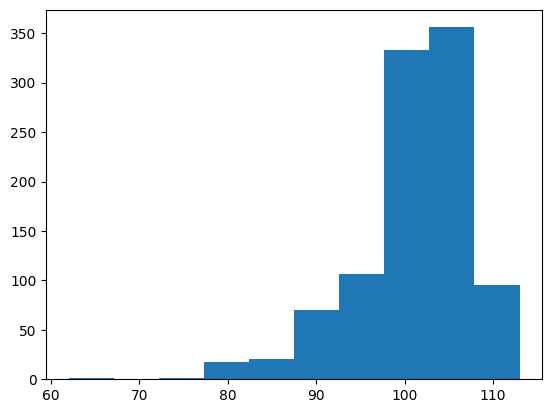

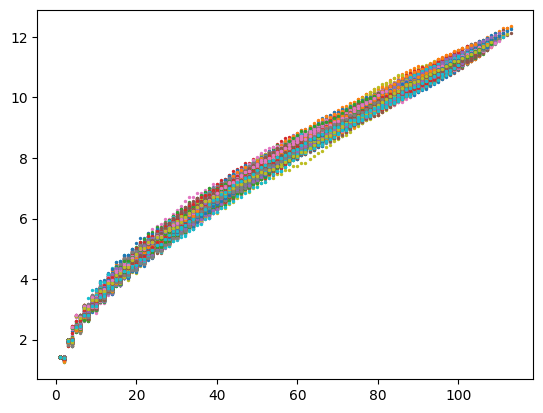

In [8]:
plt.hist(updatesA)
plt.show()
for rec in normsA:
    plt.scatter(list(range(1, len(rec) + 1)), rec, s=2.)
plt.show()

In [ ]:
n_experiment = 1000
updatesB = []
normsB = []
for i in range(n_experiment):
    np.random.seed(i)
    if i % 100 == 0:
        print(f"{i}-th experiment of PLA")
    n_updates, weight_norms = experiment_pla_modified(train, label)
    updatesB.append(n_updates)
    normsB.append(weight_norms)

In [ ]:
plt.hist(updatesB)
plt.show()
for rec in normsB:
    plt.scatter(list(range(1, len(rec) + 1)), rec, s=2.)
plt.show()

In [ ]:
np.array(normsA).mean()

In [ ]:
normsB

In [ ]:
def accuracy(w, train, label):
    n = len(train)
    corrects = 0
    for x, y in zip(train, label):
        if predict(w, x) == y:
            corrects += 1
    return corrects / n

In [ ]:
accuracy(w, train, label)

In [ ]:
iters